In [64]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from scipy.optimize import curve_fit

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

%matplotlib inline
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'axes.titlepad': 16,
         'axes.titlesize': 20,
         'axes.labelpad': 16,
         'axes.labelsize': 16,
         'lines.linewidth': 3,
         'lines.markersize': 8,
         'xtick.labelsize': 12,
         'ytick.labelsize': 12}
plt.rcParams.update(params)

sns.despine()

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 100)

## 1. Analisis base de datos SIES

In [65]:
data_file="data/titulado_2007-2016_web_17-07-2017_.csv"
data_df=pd.read_csv(data_file, header=0, sep=';')

/Users/rmunoz/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [66]:
data_df.head()

,AÑO,TOTAL TITULADOS,TITULADOS MUJERES POR PROGRAMA,TITULADOS HOMBRES POR PROGRAMA,CLASIFICACIÓN INSTITUCIÓN NIVEL 1,CLASIFICACIÓN INSTITUCIÓN NIVEL 2,CLASIFICACIÓN INSTITUCIÓN NIVEL 3,CÓDIGO INSTITUCIÓN,NOMBRE INSTITUCIÓN,CIUDAD,REGIÓN,NOMBRE CARRERA,ÁREA DEL CONOCIMIENTO,OECD ÁREA,OECD SUBAREA,ÁREA CARRERA GENÉRICA,NIVEL GLOBAL,CARRERA CLASIFICACIÓN NIVEL 1,CARRERA CLASIFICACIÓN NIVEL 2,MODALIDAD,JORNADA,TIPO DE PLAN DE LA CARRERA,DURACIÓN ESTUDIO CARRERA,DURACIÓN TOTAL DE LA CARRERA,CÓDIGO CARRERA,TOTAL RANGO EDAD,RANGO DE EDAD 15 A 19 AÑOS,RANGO DE EDAD 20 A 24 AÑOS,RANGO DE EDAD 25 A 29 AÑOS,RANGO DE EDAD 30 A 34 AÑOS,RANGO DE EDAD 35 A 39 AÑOS,RANGO DE EDAD 40 Y MÁS AÑOS,RANGO DE EDAD SIN INFORMACIÓN,PROMEDIO EDAD CARRERA,PROMEDIO EDAD MUJER,PROMEDIO EDAD HOMBRE
0,TIT_2007,14,9.0,5.0,Universidades,Universidades Privadas,Universidades Privadas,1,UNIVERSIDAD GABRIELA MISTRAL,SANTIAGO,REGIÓN METROPOLITANA,CONTADOR AUDITOR,Administración y Comercio,"Ciencias Sociales, Enseñanza Comercial y Derecho",Enseñanza Comercial y Administración,Contador Auditor,Pregrado,Profesional Con Licenciatura,Carreras Profesionales,NaN,Vespertino,Plan Regular,8.0,9.0,A2007_C_0011010022,14,NaN,NaN,4.0,5.0,4.0,1.0,NaN,"33,5","33,9","32,8"
1,TIT_2007,7,2.0,5.0,Universidades,Universidades Privadas,Universidades Privadas,1,UNIVERSIDAD GABRIELA MISTRAL,PUERTO VARAS,X REGIÓN,P/E INGENIERIA COMERCIAL PARA CONTADORES AUDITORES E INGENIEROS DE EJECUCION EN ADMINISTRACION D...,Administración y Comercio,"Ciencias Sociales, Enseñanza Comercial y Derecho",Enseñanza Comercial y Administración,Ingeniería Comercial,Pregrado,Profesional Con Licenciatura,Carreras Profesionales,NaN,Vespertino,Plan Especial,3.0,4.0,A2007_C_0011020412,7,NaN,NaN,2.0,2.0,1.0,2.0,NaN,"33,7","31,5","34,6"
2,TIT_2007,4,3.0,1.0,Universidades,Universidades Privadas,Universidades Privadas,1,UNIVERSIDAD GABRIELA MISTRAL,PUERTO VARAS,X REGIÓN,INGENIERIA DE EJECUCION EN ADMINISTRACION DE EMPRESAS,Administración y Comercio,"Ciencias Sociales, Enseñanza Comercial y Derecho",Enseñanza Comercial y Administración,Administración de Empresas e Ing. Asociadas,Pregrado,Profesional Sin Licenciatura,Carreras Profesionales,NaN,Vespertino,Plan Regular,8.0,8.0,A2007_C_0011020202,4,NaN,1.0,3.0,NaN,NaN,NaN,NaN,"25,8","25,3",27
3,TIT_2007,28,14.0,14.0,Universidades,Universidades Privadas,Universidades Privadas,1,UNIVERSIDAD GABRIELA MISTRAL,SANTIAGO,REGIÓN METROPOLITANA,DERECHO,Derecho,"Ciencias Sociales, Enseñanza Comercial y Derecho",Derecho,Derecho,Pregrado,Profesional Con Licenciatura,Carreras Profesionales,NaN,Diurno,Plan Regular,10.0,12.0,A2007_C_0011010031,28,NaN,8.0,12.0,6.0,NaN,2.0,NaN,"27,9","27,9","27,9"
4,TIT_2007,17,17.0,NaN,Universidades,Universidades Privadas,Universidades Privadas,1,UNIVERSIDAD GABRIELA MISTRAL,SANTIAGO,REGIÓN METROPOLITANA,LICENCIATURA EN EDUCACION PARVULARIA,Educación,Educación,Ciencias de la Educación,Bachillerato y/o Licenciatura en Educación,Pregrado,Licenciatura No Conducente a Título,Carreras Profesionales,NaN,Diurno,Plan Regular,8.0,9.0,A2007_C_0011010051,17,NaN,8.0,8.0,1.0,NaN,NaN,NaN,"25,2","25,2",NaN


In [67]:
data_df.dtypes.to_frame().transpose()

,AÑO,TOTAL TITULADOS,TITULADOS MUJERES POR PROGRAMA,TITULADOS HOMBRES POR PROGRAMA,CLASIFICACIÓN INSTITUCIÓN NIVEL 1,CLASIFICACIÓN INSTITUCIÓN NIVEL 2,CLASIFICACIÓN INSTITUCIÓN NIVEL 3,CÓDIGO INSTITUCIÓN,NOMBRE INSTITUCIÓN,CIUDAD,REGIÓN,NOMBRE CARRERA,ÁREA DEL CONOCIMIENTO,OECD ÁREA,OECD SUBAREA,ÁREA CARRERA GENÉRICA,NIVEL GLOBAL,CARRERA CLASIFICACIÓN NIVEL 1,CARRERA CLASIFICACIÓN NIVEL 2,MODALIDAD,JORNADA,TIPO DE PLAN DE LA CARRERA,DURACIÓN ESTUDIO CARRERA,DURACIÓN TOTAL DE LA CARRERA,CÓDIGO CARRERA,TOTAL RANGO EDAD,RANGO DE EDAD 15 A 19 AÑOS,RANGO DE EDAD 20 A 24 AÑOS,RANGO DE EDAD 25 A 29 AÑOS,RANGO DE EDAD 30 A 34 AÑOS,RANGO DE EDAD 35 A 39 AÑOS,RANGO DE EDAD 40 Y MÁS AÑOS,RANGO DE EDAD SIN INFORMACIÓN,PROMEDIO EDAD CARRERA,PROMEDIO EDAD MUJER,PROMEDIO EDAD HOMBRE
0,object,int64,float64,float64,object,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object,int64,float64,float64,float64,float64,float64,float64,float64,object,object,object


In [68]:
data_df['AÑO'].unique()

array(['TIT_2007', 'TIT_2008', 'TIT_2009', 'TIT_2010', 'TIT_2011',
       'TIT_2012', 'TIT_2013', 'TIT_2014', 'TIT_2015', 'TIT_2016'], dtype=object)

In [69]:
data_df['NIVEL GLOBAL'].unique()

array(['Pregrado', 'Postítulo', 'Postgrado'], dtype=object)

In [70]:
data_df['CARRERA CLASIFICACIÓN NIVEL 1'].unique()

array(['Profesional Con Licenciatura', 'Profesional Sin Licenciatura',
       'Licenciatura No Conducente a Título', 'Postítulo', 'Magister',
       'Diplomado (superior a un semestre)', 'Técnico de Nivel Superior',
       'Especialidad Médica U Odontológica', 'Doctorado'], dtype=object)

In [71]:
data_df['CARRERA CLASIFICACIÓN NIVEL 2'].unique()

array(['Carreras Profesionales', 'Postítulo', 'Magister',
       'Carreras Técnicas', 'Doctorado'], dtype=object)

In [72]:
año_str={'TIT_2007':2007, 'TIT_2008':2008, 'TIT_2009':2009, 'TIT_2010':2010, 'TIT_2011':2011,
       'TIT_2012':2012, 'TIT_2013':2013, 'TIT_2014':2014, 'TIT_2015':2015, 'TIT_2016':2016}
data_df['año'] = data_df['AÑO'].map(año_str)

In [73]:
data_df['año'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [111]:
mineduc_df=pd.DataFrame(data_df[data_df['CARRERA CLASIFICACIÓN NIVEL 1']=='Doctorado'].groupby('año')['TOTAL TITULADOS'].sum())#.reset_index()
mineduc_df=mineduc_df.rename(columns={"TOTAL TITULADOS":"n_egresados"})
mineduc_df.loc[2017]=np.NaN
mineduc_df

,n_egresados
año,
2007,315.0
2008,374.0
2009,383.0
2010,426.0
2011,492.0
2012,604.0
2013,639.0
2014,619.0
2015,692.0


In [112]:
mineduc_df['n_matriculados']=pd.Series({2008:3629, 2009:3738, 2010:4055, 2011:4052,
                                        2012:4471, 2013:4653, 2014:4925, 2015:5172,
                                        2016:5545, 2017:5540})
mineduc_df.reset_index(inplace=True)
mineduc_df

,año,n_egresados,n_matriculados
0,2007,315.0,NaN
1,2008,374.0,3629.0
2,2009,383.0,3738.0
3,2010,426.0,4055.0
4,2011,492.0,4052.0
5,2012,604.0,4471.0
6,2013,639.0,4653.0
7,2014,619.0,4925.0
8,2015,692.0,5172.0
9,2016,704.0,5545.0


/Users/rmunoz/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


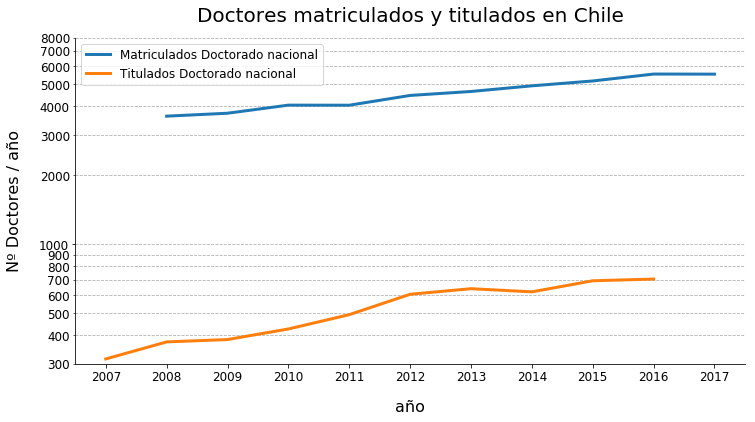

In [133]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

mineduc_df.plot(kind="line", ax=ax, x="año", y="n_matriculados", logy=True)
mineduc_df.plot(kind="line", ax=ax, x="año", y="n_egresados")

ax.legend(["Matriculados Doctorado nacional","Titulados Doctorado nacional"],
          frameon=True)

ax.set_ylim(3e2,8e3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(linestyle="--", which="both")

ax.set_xticks(mineduc_df['año'])

ax.yaxis.set_minor_formatter(matplotlib.ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.title("Doctores matriculados y titulados en Chile")
plt.ylabel("Nº Doctores / año")

plt.savefig('figures/cti/figura_1_numero_doctores.png', bbox_inches='tight')
plt.savefig('figures/cti/figura_1_numero_doctores.pdf', bbox_inches='tight')

In [57]:
(1e4-1e3)/9

1000.0

In [43]:
locmaj.tick_values

<bound method LogLocator.tick_values of <matplotlib.ticker.LogLocator object at 0x1a12c11a58>>

## 2. Analisis de bases de datos Fondecyt

In [135]:
fondecyt_df=pd.read_csv('data/fondecyt postdoc 2010-2018.csv')
fondecyt_df

,año,n_concursados,n_aprobados,monto_solicitado,monto_aprobado
0,2007,58,37,NaN,922052
1,2008,110,74,1684744.0,1132227
2,2009,76,66,1245880.0,1084471
3,2010,140,80,6856883.0,3959662
4,2011,172,90,8686381.0,4662685
5,2012,226,150,12282093.0,8274817
6,2013,432,238,26740972.0,14980070
7,2014,629,303,40757915.0,19868554
8,2015,700,301,46696085.0,20580012
9,2016,791,291,55318090.0,20870304


In [15]:
conicyt_extranjero_df=pd.read_csv('data/conicyt - egresados doctorado extranjero 2012-2015.csv')
conicyt_extranjero_df.head()

,año,n_egresados
0,2012,222
1,2013,284
2,2014,323
3,2015,337


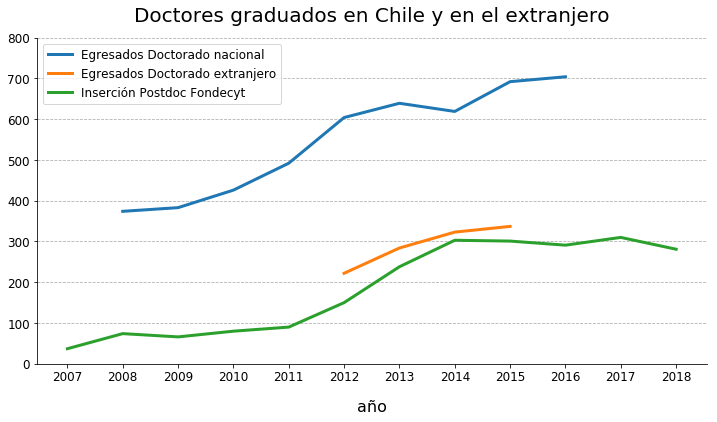

In [19]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
mineduc_df[mineduc_df['año'] < 2017].plot(kind="line", x="año", y="n_egresados", ax=ax)
conicyt_extranjero_df.plot(kind="line", x="año", y="n_egresados", ax=ax)
#fondecyt_df.plot(kind="line", x="año", y="n_concursados", ax=ax)
fondecyt_df.plot(kind="line", x="año", y="n_aprobados", ax=ax)

ax.legend(["Egresados Doctorado nacional","Egresados Doctorado extranjero", "Inserción Postdoc Fondecyt"],
          frameon=True)

ax.set_ylim(0,800)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(linestyle="--")

major_ticks = np.arange(2007, 2019, 1)
ax.set_xticks(major_ticks);

plt.title("Doctores graduados en Chile y en el extranjero")

plt.savefig('figures/cti/figura_1_numero_doctores_egresados.png', bbox_inches='tight')
plt.savefig('figures/cti/figura_1_numero_doctores_egresados.pdf', bbox_inches='tight')

## Using linear regression model

In [ ]:
data = {'año':np.array([2010,2011,2012,2013,2014]), 'n_doctores':np.array([433.,474.,584.,630.,650.])}
data_df = pd.DataFrame(data)

data_df.plot(kind='line', x='año', y='n_doctores')

In [ ]:
X=data['año'][:, np.newaxis]
y=data['n_doctores']

poly = PolynomialFeatures(degree=1)
X_ = poly.fit_transform(X)

clf = linear_model.LinearRegression()
clf.fit(X_, y)

In [ ]:
clf.score(X_,y)

In [ ]:
predict=np.arange(2010,2018).reshape(-1, 1)
predict_ = poly.fit_transform(predict)

print(clf.predict(predict_))

## Using sigmoid function

In [ ]:
def sigmoid(x, x0, k, a, c):
    y = a / (1 + np.exp(-k*(x-x0))) + c
    return y

In [ ]:
popt, pcov = curve_fit(sigmoid, data['año'], data['n_doctores'])
print(popt)
print(pcov)

In [ ]:
x_predict=np.arange(2010,2018)
y_predict = sigmoid(predict, *popt)

print(y_predict)

## Using logistic regression model

In [ ]:
clf = linear_model.LogisticRegression()
clf.fit(X, y)

In [ ]:
clf.coef_

In [ ]:
def model(x):
    return 1 / (1 + np.exp(-x))

predict=np.arange(2010,2018)[:, np.newaxis]
result = model(predict * clf.coef_ + clf.intercept_).ravel()
result

In [ ]:
clf.intercept_

In [ ]:
predict=np.arange(2010,2018)
predict * clf.coef_# + clf.intercept_

In [ ]:
data = {'año':[2010,2011,2012,2013,2014], 'n_doctores':[433,474,584,630,650]}
data_df = pd.DataFrame(data)

data_df.plot(kind='line', x='año', y='n_doctores')